<h1 align="center">Física Computacional.</h1>
<h1 align="center">Semestre 2024-1</h1>

<h2>Alumno: Rivas Moreno Javier </h2>

<h1 align="center">Programación para la física computacional</h1>

<h2> Profesor: Sergio A. Alcalá Corona </h2>

---
### Ayudantes:
#### Daniel Rojo Mata
#### Rodrigo Vega Vilchis
---

## Práctica 4.  Métodos Numéricos Básicos en Física Coputacional: INtegración y Diferenciación Numérica


### Programación básica para la física

---

### EJERCICIOS:

**1. El límite de difracción de un telescopio** 

Nuestra capacidad para resolver detalles en observaciones astronomicas está limitada por la difracción de la luz en nuestros telescopios. La luz de las estrellas puede considerarse efectivamente como si proviniera de una fuente puntual en el infinito. Cuando dicha luz, con una longitud de onda $\lambda$, pasa a traves de la apertura circular de un telescopio (que supondremos que tiene un rádio unitario) y es enfocada por el telescopio en el plano focal, no produce un solo punto, sino un patron de difracción circular que consta de un punto central rodeado por una serie de anillos concéntricos. La intensidad de la luz en este patron de difracción está dada por:

<h3 align="center">$ I(r) = {(J_{1}(kr)\over{kr})^{2}} $</h3> 

donde r es la distancia en el plano focal desde el centro del patrón de difracci ón, $k =2\pi/\lambda$ y $J_{1}(x)$ es una función de Bessel. Las funciones de Bessel $J_{m}(x)$ estan dadas por:

<h3 align="center">$ J_{m}(x) = {1\over\pi}{\int_{0}^{\pi}Cos(m\theta-xSen(\theta)) d\theta} $</h3> 

donde $m$ es un entero no negativo y $x ≥ 0$.

a) Escribe una función $J(m,x)$ que calcule el valor de $J_{m}(x)$ usando la regla de Simpson con $N = 1000$ puntos. Utiliza dicha función en un programa para graficar, en un solo gráfico, las funciones de Bessel $J_{0}$, $J_{1}$ y $J_{2}$ como una función de $x$ (de $x = 0$ a $x = 20$).

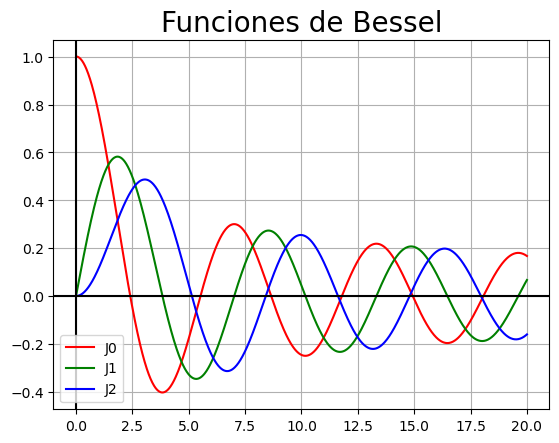

In [275]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

def f(theta, m, x):
    return np.cos(m*theta-x*np.sin(theta))

def Int_Simpson(f, a, b, N):
    h = (b-a)/N
    theta = np.arange(a, b, h)
    suma1 = 0
    suma2 = 0
    for i in list(range(0, int(theta.size/2))):
        suma1 += f(a+(2*i+1)*h, m, x)
        suma2 += f(a+2*i*h, m, x)
    Int_total = (h/3)*(f(a, m, x)+f(b, m, x)+(4*suma1)+(2*suma2))
    return Int_total

a = 0
b = np.pi
N = 1000

x = np.linspace(0, 20, N)

m = 0
J0 = Int_Simpson(f, a, b, N)/np.pi
plt.plot(x, J0, "r", label = "J0")

m = 1
J1 = Int_Simpson(f, a, b, N)/np.pi
plt.plot(x, J1, "g", label = "J1")

m = 2
J2 = Int_Simpson(f, a, b, N)/np.pi
plt.plot(x, J2, "b", label = "J2")

plt.legend(loc=3)
plt.grid()
plt.title("Funciones de Bessel",fontsize=20)
plt.axhline(y = 0.0, xmin = 0.0, color = 'black')
plt.axvline(x = 0.0, ymin = 0.0, color = 'black')

b) Compara tus resultados con los proporcionados con la biblioteca de scipy que implementa la regla de Simpson.

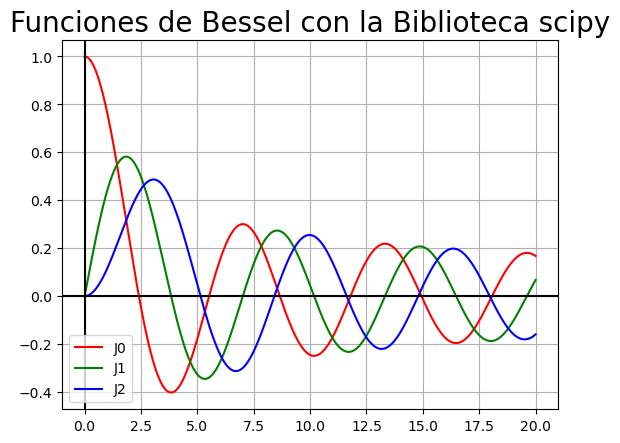

In [291]:
import scipy.integrate as sp
import numpy as np
import matplotlib.pyplot as plt

theta = np.linspace(0, np.pi, 1000)

J0 = []
J1 = []
J2 = []
x = []

for y in np.linspace(0, 20 , 1000):
    I0 = (sp.simps(np.cos(0*theta-y*np.sin(theta)), theta))/(np.pi)
    J0.append(I0)
    x.append(y)
    
for y in np.linspace(0, 20 , 1000):
    I1 = (sp.simps(np.cos(1*theta-y*np.sin(theta)), theta))/(np.pi)
    J1.append(I1)
    
for y in np.linspace(0, 20 , 1000):
    I2 = (sp.simps(np.cos(2*theta-y*np.sin(theta)), theta))/(np.pi)
    J2.append(I2)
    
plt.plot(x, J0, "r", label = "J0")
plt.plot(x, J1, "g", label = "J1")
plt.plot(x, J2, "b", label = "J2")

plt.legend(loc=3)
plt.grid()
plt.title("Funciones de Bessel con la Biblioteca scipy",fontsize=20)
plt.axhline(y = 0.0, xmin = 0.0, color = 'black')
plt.axvline(x = 0.0, ymin = 0.0, color = 'black')

c) Escribe un segundo programa que haga una gráfica de densidad (density plot) de la intensidad del patrón de difracción circular de una fuente de luz puntual con $\lambda = 500 nm$, en una región cuadrada del plano focal, usando la fórmula dada anteriormente. Su imagen debe cubrir valores de $r$ desde cero hasta aproximadamente $1 \mu m$.

C:\Users\Javier\AppData\Local\Temp\ipykernel_3848\1517219842.py:14: RuntimeWarning: divide by zero encountered in scalar divide
  J1 = ((sp.simps(np.cos(1*theta-y*np.sin(theta)), theta))/(np.pi*y))**2


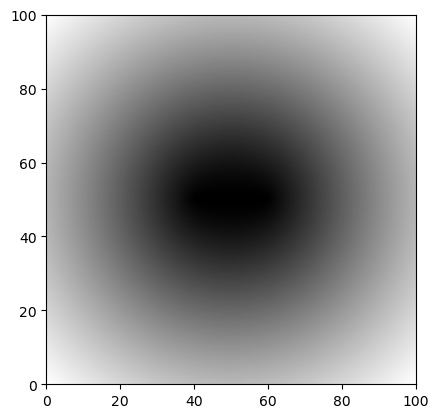

In [334]:
import numpy as np
import scipy.integrate as sp
import matplotlib.pyplot as plt
from pylab import imshow, gray, show

L = 500
k =(2*np.pi)/L
N = 1000
theta = np.linspace(0, np.pi, 1000)

I1 = []
r = []
for y in np.linspace(0, 1000*k, N):
    J1 = ((sp.simps(np.cos(1*theta-y*np.sin(theta)), theta))/(np.pi*y))**2
    r.append(y)
    I1.append(J1)
    
xi0 = 1.0
separation = 20.0      # Separacion de los centros en cm
side = 100.0           # lado del cuadro en cm
points = 1000           # Número de puntos de la cuadrícula a lo largo de cada lado
spacing = side/points

x1 = side/2 + separation/2
y1 = side/2
x2 = side/2 - separation/2
y2 = side/2

# Crea un arreglo para almacenar las alturas.
xi = np.empty([points,points],float)

# Calcula los valores en el arreglo.
for i in range(points):
    z = spacing*i
    for j in range(points):
        w = spacing*j
        r1 = np.sqrt((w-x1)**2+(z-y1)**2)
        r2 = np.sqrt((w-x2)**2+(z-y2)**2)
        xi[i,j] = xi0*np.sin(k*r1) + xi0*np.sin(k*r2)

# Hace la gráfica
imshow(xi,origin="lower",extent=[0,side,0,side])

**2. Error de Estimación**

Escribe un programa, o modifica alguno de los que hicimos en clase, para calcular el valor de la integral $\int_{0}^{2}(x^{4}-2x-1)$, usando el regla trapezoidal con cortes de 20, pero esta vez haz que el programa tambien imprima una estimación del error en el resultado, calculado usando la ecuacion:

<h3 align="center">$ \epsilon = {1\over{3}}(I_{2}-I_{1}) $</h3> 

donde $\epsilon$ es el error e $I_{1}$ e $I_{2}$ son estimaciones usando con $N_{1}$ y $N_{2}$ pasos respectivamente. Por lo que necesitarás evaluar la integral dos veces, una con $N_{1} = 10$ “rebanadas” y luego otra vez con $N_{2} = 20$ “rebanadas”.

a) ¿Cómo se compara el error calculado de esta manera con un cálculo directo del error como la diferencia entre su valor para la integral y el valor verdadero de $4.4$? ¿Por qué los dos no concuerdan perfectamente?

In [41]:
# Regla del Trapecio
import numpy as np
import matplotlib.pyplot as plt

# Función
fx = lambda x: ((x**4)-(2*x)+1)

# Intervalo de integración
a = 0
b = 2

# Definimos los dos tramos a usar
N1 = 10
N2 = 20

# La primera integral
h1 = (b-a)/N1
xi = a
suma1 = fx(xi)
for i in range(0,N1-1,1):
    xi = xi + h1
    suma1 = suma1 + 2*fx(xi)
suma1 = suma1 + fx(b)
int1 = h1*(suma1/2)

# La segunda integral
h2 = (b-a)/N2
xk = a
suma2 = fx(xk)
for k in range(0,N2-1,1):
    xk = xk + h2
    suma2 = suma2 + 2*fx(xk)
suma2 = suma2 + fx(b)
int2 = h2*(suma2/2)

print("La integral utilizando N1 =", N1, "es igual a: ", int1)
print("La integral utilizando N2 =", N2, "es igual a: ", int2)

# Para caluclar el error en el resultado suamos
e = (1/3)*(int2-int1)

print("La estimación del error en el resultado será: ", e)
print()

print("Calculando el error como la diferencia entre el valor de la integral obtenido y el valor real de 4.4 obtenemos:")

e1 = int1-4.4
e2 = int2-4.4

print("El error entre el valor real y la primera integral de N1 pasos es: ", e1)
print("El error entre el valor real y la segunda integral de N2 pasos es: ", e2)

La integral utilizando N1 = 10 es igual a:  4.5065599999999995
La integral utilizando N2 = 20 es igual a:  4.4266600000000045
La estimación del error en el resultado será:  -0.026633333333331656

Calculando el error como la diferencia entre el valor de la integral obtenido y el valor real de 4.4 obtenemos:
El error entre el valor real y la primera integral de N1 pasos es:  0.1065599999999991
El error entre el valor real y la segunda integral de N2 pasos es:  0.026660000000004125


Podemos observar que los errores obteidos con la fórmual para $\epsilon$ y los calculados con las diferencias no concuerdan, esto por que Python almacena los números decimales en binario y pasar de decimal a binario provoca errores de redondeo.

b) Compara tus resultados con los proporcionados con la biblioteca de scipy que implementa la regla trapezoidal.

In [169]:
import scipy.integrate as sp
import numpy as np

# Integral para dos inervalos tomando N1 y N2
x = np.linspace(0, 2, 10)
I = ((x**4)-(2*x)+(1))
T1 = sp.trapz(I, x)
y = np.linspace(0, 2, 20)
I = ((y**4)-(2*y)+(1))
T2 = sp.trapz(I, y)

print("La integral utilizando la biblioteca scipy con la regla trapezoidal es: ")
print("Tomando 10 pasos:", T1)
print("Tomando 20 pasos:", T2)
print()

# Para el error
e = (1/3)*(T2-T1)

print("Con un error entre estos de ", e)


La integral utilizando la biblioteca scipy con la regla trapezoidal es: 
Tomando 10 pasos: 4.531524665955393
Tomando 20 pasos: 4.429539368175504

Con un error entre estos de  -0.03399509925996291


**3. Capacidad calorífica de un sólido**

La *teoría de sólidos de Debye* dice que la *capacidad calorífica* de un solido a una temperatura $T$ esta dada por:

<h3 align="center">$ C_{V} = {9V\rho k_{B}}{\left({T\over{\theta_{D}}}\right)^{3}}{\int_{0}^{\theta_{D}/T}{{x^{4}e^{x}}\over{(e^{x}-1)}}}dx $</h3> 

donde V es el volumen del sólido, $\rho$ es la densidad numérica de los átomos, $k_{B}$ es la constante de Boltzmann y $\theta_{D}$ es la llamada *temperatura de Debye*, una propiedad de sólidos que depende de su densidad y la velocidad del sonido.

a) Escribe una función $C_{V}(T)$ que calcule la $C_{V}$ para un valor dado de temperatura, de una muestra que consta de 1000 centímetros cúbicos de aluminio sólido, con densidad numérica de $\rho = 6.022\times 10^{28} m^{−3}$ y una temperatura de Debye de $\theta_{D} = 428$ K. Utiliza la **cuadratura gaussiana** para evaluar la integral, con $N = 50$ *puntos muestra*.

b) Usa tu función para hacer una gráfica de la capacidad calorífica en función de la temperatura desde $T = 5$ K hasta $T = 500$ K.

**4. Incertidumbre cuántica en el oscilador armónico**

En unidades donde todas las constantes son 1, la funcion de onda del *n*ésimo nivel de energía del oscilador armonico cuántico unidimensional, (i.e., una partícula puntual sin espín en un pozo de potencial cuadratico) está dada por: 

<h3 align="center">$ \psi_{n}(x) = {1\over{\sqrt{2^{n}n!\sqrt{\pi}}}}e^{-x^{2}/2}H_{n}(x) $</h3>

para $n = 0...\infty$, donde $H_{n}(x)$ es el *n*ésimo polinomio de Hermite. Los polinomios de Hermite satisfacen una relación algo similar a la de los números de Fibonacci, aunque más compleja:

<h3 align="center">$ H_{n+1}(x) = 2xH_{n}(x) − 2nH_{n−1}(x) $</h3>
    
Los dos primeros polinomios de Hermite son $H_{0}(x) = 1$ y $H_{1}(x) = 2x$.

a) Escribe una función $H(n,x)$ que calcule $H_{n}(x)$ dados $x$ y cualquier número entero $n ≥ 0$. Utiliza tu funcion para hacer una gráfica que muestre las funciones de onda del oscilador armónico para $n = 0, 1, 2$ y $3$, todos en el mismo gráfico, en el rango de $x = −4$ a $x = 4$. *Hint:* Hay una función factorial en el paquete math que calcula el factorial de un número entero.

In [335]:
import numpy as np
import matplotlib.pyplot as plt

def H(n, x):
    if n == 0:
        return 1
    elif n == 1:
        return 2*x
    else:
        return ((2*x*H(n-1, x))-(2*n*H(n-2, x)))

print(H(2, 2))

12


b) Haz una gráfica aparte, de la función de onda para $n = 30$ desde $x = −10$ hasta $x = 10$. *Hint:* si tu programa tarda demasiado en ejecutarse en este caso, entonces está haciendo mal el cálculo; el programa debería tardar aproximadamente un segundo en ejecutarse.

c) La incertidumbre cuántica de una partícula en el nesimo nivel de un oscilador armónico cuántico se puede cuantificar mediante su *media cuadrática* $\sqrt{\langle x^{2}\rangle}$, donde: 

<h3 align="center">$ \langle x^{2}\rangle = {\int_{-\infty}^{\infty}{x^{2}|\psi_{n}(x)|^{2}}dx} $</h3>

Escribe un programa que evalúe esta integral usando la cuadratura gaussiana en 100 puntos y luego calcula la incertidumbre (es decir, la posicion media cuadráticamde la partícula) para un valor dado de $n$. Utiliza tu programa para calcular la incertidumbre para $n = 5$. Deberías obtener una respuesta cercana a $\sqrt{\langle x^{2}\rangle} = 2.3$.

**5. Atracción gravitacional de una lámina uniforme**

Una lamina de metal cuadrada uniforme flota inmóvil en el espacio:

<img src="PlacaTarea4.jpg">

La lámina mide 10 m de lado, tiene un espesor insignificante y una masa de 10 toneladas.

a) Considera la fuerza gravitacional debida a la placa que siente una masa puntual de 1 kg a una distancia $z$ del centro del cuadrado, en dirección perpendicular a la lámina, como se muestra en la figura. Demuestra que la componente de la fuerza a lo largo del eje $z$ es

<h3 align="center">$ F_{z} = G\sigma z \int \int_{-L/2}^{L/2}{{dxdy}\over{(x^{2}+y^{2}+z^{2})^{3/2}}} $</h3>

donde $G = 6.674 \times 10^{−11}$ $m^{3} kg^{−1} s^{−2}$ es la constante gravitacional de Newton y $\sigma$ es la masa por unidad de área de la hoja.

**Respuesta**


b) Escribe un programa para calcular y graficar la fuerza en función de $z$ de $z = 0$ hasta $z = 10$ m. Para la integral doble utiliza la cuadratura Gaussiana (doble)

<h3 align="center">$ I \simeq {\sum_{i=1}^{N}\sum_{j=1}^{N}\omega_{i}\omega_{j}f(x_{i}, x_{j})} $</h3>


con 100 puntos de muestra a lo largo de cada eje.

Text(0, 0.5, 'Fz')

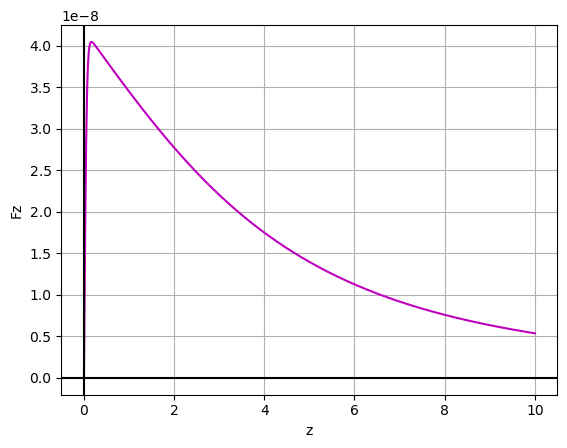

In [229]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

# Función a integrar
def F(x, y):
    return 1/(((x**2)+(y**2)+(z**2))**(3/2))

# Método de cuadratura de Gauss
def gauss2D_xw_ab(N,a,b,c,d):
    x,w = sp.special.roots_legendre(N)
    X = 0.5*(b-a)*x+0.5*(b+a),0.5*(b-a)*w
    Y = 0.5*(d-c)*x+0.5*(d+c),0.5*(d-c)*w
    return Y,X

def CuadGauss2D(N, f, a, b, c, d):
    S = 0.0
    Sx = 0.0
    Sy = 0.0
    Y,X = gauss2D_xw_ab(N, a, b, c, d)
    yj = Y[0]
    xi = X[0]
    wj = Y[1]
    wi = X[1]
    for i in range(N):
        for j in range(N):
            S = S + wi[i]*wj[j]*f(xi[i],yj[j])   
    return S

# Límites de z
z = np.linspace(0, 10, N)

# Valores dados de los límites y los puntos
N = 100
L = 10
c, d = -L/2, L/2
a, b = -L/2, L/2

I = CuadGauss2D(N, F, a, b, c, d)

# Cosntantes a tomar
G = 6.674*(10**(-11))
m = 10000 # Masa ya en kilogramos
c = m/(L**2) # Sigma dada por la masa sobre el área de la placa

# Cálculo de la fuerza en z
Fz = G*c*z*I

# Gráfica
plt.plot(z, Fz, "m")
plt.grid()
plt.axhline(y = 0.0, xmin = 0.0, color = 'black')
plt.axvline(x = 0.0, ymin = 0.0, color = 'black')
plt.xlabel("z")
plt.ylabel("Fz")

c) Deberías ver una curva suave, excepto en valores muy pequeños de $z$, donde la fuerza debería caer repentinamente a cero. Esta caída no es un efecto real, sino un artefacto de la forma en que hemos realizado el cálculo. Explica brevemente de dónde viene este artefacto y sugiere una estrategia para eliminarlo, o al menos disminuir su tamaño.

Este cálculo puede considerarse como un modelo de la atracción gravitacional de una galaxia. La mayor parte de la masa de una galaxia espiral (como nuestra Vía Lactea) se encuentra en un plano o disco delgado que pasa por el centro galáctico, y la atracción gravitacional ejercida por ese plano sobre cuerpos fuera de la galaxia se puede calcular con los métodos que hemos empleado aquí.

**Respuesta**

Si aumentamos el valor de N, los puntos de muestra tomados disminuimos esta caida repentina cerca de 0, no se elimina completamente pero logramos redcurilo lo máximo posible; este efecto se da por la manera de tomar los datos ya que damos que en 0 esta función debe anularse y no diverger.

**6. Diferenciación numérica**

Crea una función por el usuario $f(x)$ que devuelva el valor ${1+{1\over{2}}\tanh{2x}}$, luego usa una **diferencia central** para calcular la derivada de la función en el rango $−2 \leq  x \leq  2$. Calcula la derivada analíticamente y haz una gráfica con tu resultado numérico y la respuesta analítica en el mismo gráfico. Puede resultar útil graficar la respuesta exacta  como líneas y la numérica como puntos. (Hint: usa la función *tanh* del paquete *math*.)

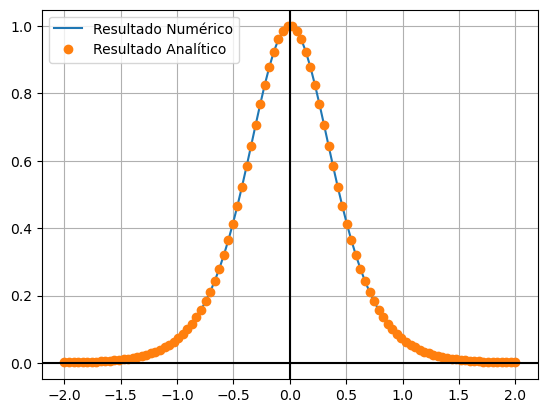

In [241]:
import numpy as np
import matplotlib.pyplot as plt

h = 0.0001

def f(x):
    return (1)+((1/2)*np.tanh(2*x))
    
x= np.linspace(-2, 2, 100)

y = (f(x+(h/2))-f(x-(h/2)))/h
    
def d(x):
    return 1/np.cosh(2*x)**2

d = d(x)

plt.plot(x, y, label = "Resultado Numérico")
plt.plot(x, d, "o", label = "Resultado Analítico")

plt.legend(loc=2)
plt.grid()
plt.axhline(y = 0.0, xmin = 0.0, color = 'black')
plt.axvline(x = 0.0, ymin = 0.0, color = 'black')

**7. Procesamiento de imágenes y STM**

Cuando la luz incide sobre una superficie, la cantidad que cae por unidad de área depende no sólo de la intensidad de la luz, sino también del ángulo de incidencia. Si la luz forma un ángulo $\theta$ con la normal, solo “ve” una fracción $\cos\theta$ de área, por unidad de área real en la superficie:

<img src="STMTarea4.jpg">

Así, la intensidad de la iluminación es $a \cos{\theta}$, si a es la intensidad bruta de la luz. Esta simple ley física es un elemento central de los graficos por computadora en 3D. Nos permite calcular cómo incide la luz sobre objetos tridimensionales y, por tanto, cómo se veran cuando se iluminen desde varios ángulos.

Supongamos, por ejemplo, que miramos la Tierra desde arriba y vemos sus montañas. Conocemos la altura de las montañas $w(x, y)$ en función de la posición en el plano, por lo que la ecuación para la superficie de la Tierra es simplemente $z = w(x, y)$, o equivalentemente $w(x, y)−z=0$, y el vector normal $\vec{v}$ a la superficie esta dado por el gradiente de $w(x, y)−z$ de la siguiente manera:

<h3 align="center">$ \vec{v} = \triangledown[w(x, y)-z] = \begin{pmatrix} \partial/\partial x \\ \partial/\partial y \\ \partial/\partial z \end{pmatrix} [w(x, y)-z] = \begin{pmatrix} \partial w/\partial x \\ \partial w/\partial y \\ -1 \end{pmatrix} $</h3>

Ahora supongamos que tenemos luz entrante representada por un vector $\vec{a}$ con magnitud igual a la intensidad de la luz. Entonces el producto escalar de los vectores $\vec{a}$ y $\vec{v}$ es:

<h3 align="center">$ \vec{a}\cdot\vec{v} = |\vec{a}||\vec{v}|\cos{\theta} $</h3>

donde $\theta$ es el ángulo entre los vectores.

Entonces, la intensidad de la iluminación de la superficie de las montañas es:

<h3 align="center">$ I = \vec{a}\cos{\theta} = {{a_{x}(\partial w/\partial x)+a_{y}(\partial w/\partial y)-a_{z}}\over{\sqrt{(\partial w/\partial x)^{2}+(\partial w/\partial y)^{2}+1}}} $</h3>

Tomemos un caso simple donde la luz brilla horizontalmente con intensidad unitaria, a lo largo de una línea en un ángulo $\phi$ en sentido contrario a las manecillas del reloj desde el eje este-oeste, de modo que $\vec{a}=(\cos{\phi}, \sin{\phi}, 0)$. Entonces nuestra intensidad de iluminación se simplifica a: 

<h3 align="center">$ I = {{\cos{\phi}(\partial w/\partial x)+\sin{\phi}(\partial w/\partial y)}\over{\sqrt{(\partial w/\partial x)^{2}+(\partial w/\partial y)^{2}+1}}} $</h3>

Así, si podemos calcular las derivadas de la altura $w(x, y)$ y sabemos $\phi$, entonces podemos calcular la intensidad en cualquier punto.

a) El archivo adjunto *altitudes.txt*, contiene la altitud $w(x, y)$ en metros sobre el nivel del mar (o profundidad bajo el nivel del mar) de la superficie de la Tierra, medida en una cuadrícula de puntos $(x, y)$. Escribe un programa que lea este archivo y almacene los datos en una matriz. Luego calcula las derivadas $\partial w/\partial x$ y $\partial w/\partial y$ en cada punto de la cuadrícula. Explica que método utilizaste para calcularlos y por qué. (Hint: probablemente tendrás que usar más de un mátodo para obtener cada punto de la cuadrícula porque suceden cosas incómodas en los bordes de la misma). Para calcular las derivadas, necesitarás saber el valor de $h$ y la distancia en metros entre puntos de la cuadrícula, que es de aproximadamente
$30, 000$ m en este caso. 

b) Ahora, usando tus valores para las derivadas, calcula la intensidad para cada punto de la cuadrícula, con $\phi = 45^{\circ}$, y haz un gráfico de densidad de los valores resultantes en el que el brillo de cada punto depende de la correspondiente valor de intensidad. Si lo haces funcionar correctamente, la gráfica debería verse como un mapa en relieve del mundo; deberías poder ver los continentes y las cadenas montañosas en 3D. (Algunos de los problemas comunes al hacer esto, pueden ser: un mapa que está al revés o de lado, o un mapa en el que el relieve que está “de adentro hacia afuera”, lo que significa que las regiones altas se ven bajas y viceversa. Trabaja con los detalles de tu programa hasta que obtiengas un mapa que te parezca adecuado.) Hint: Ten en cuenta que el valor de la intensidad $I$ de la fórmula anterior puede ser positivo o negativo; oscila entre $+1$ y $−1$. ¿Qué significa una intensidad negativa? Significa que el área en cuestión está *en sombras* (es decir, que se encuentra en el lado equivocado de la montaña para recibir alguna luz). Podrías representar esto coloreando esas áreas del mapa completamente de negro, aunque en la práctica obtendrás una imagen más bonita (aunque tal vez menos realista) simplemente usando una gama continua de grises desde $+1$ hasta $−1$.

c) El otro archivo adjunto llamado *stm.txt*, contiene una cuadrícula con valores de mediciones de un microscopio de efecto túnel (*scanning tunneling microscope* o **STM**) de la superficie (111) del silicio. Un microscopio de efecto túnel (*STM*) es un dispositivo que mide la forma de superficies a nivel atómico siguiendo una punta afilada sobre la superficie y midiendo la *corriente de efecto túnel cuántico* en función de la posición. El resultado final es una cuadrícula de valores que representan la altura de la superficie en función de la posición y los datos del archivo *stm.txt* contienen precisamente esa rejilla de valores. Modifica tu programa anterior para
visualizar los datos STM y así crear una imagen 3D de como se ve la superficie de  silicio. El valor de $h$ para las derivadas en este caso es de alrededor de $h = 2.5$ (en unidades arbitrarias).